Importing Required Packages

In [1]:
import pandas_datareader.data as reader
import datetime as dt
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats


User Input

In [2]:
print('Enter the Portfolio Value')
port=int(input())
print('Input the number of Stock Tickers')
n=int(input())
stocktickers=[]
for i in range(0,n):
    print('Stock Ticker')
    s=input()
    s=s.upper()
    stocktickers.append(s)

    

Enter the Portfolio Value
1000000
Input the number of Stock Tickers
3
Stock Ticker
AAPL
Stock Ticker
TSLA
Stock Ticker
MSFT


Getting the Stock Data

In [3]:
end=dt.datetime.now()
start=dt.datetime(end.year-4,end.month,end.day)
df=reader.get_data_yahoo(stocktickers,start,end)['Adj Close']
returns=df.pct_change()
returns=returns.dropna()

<AxesSubplot:xlabel='Date'>

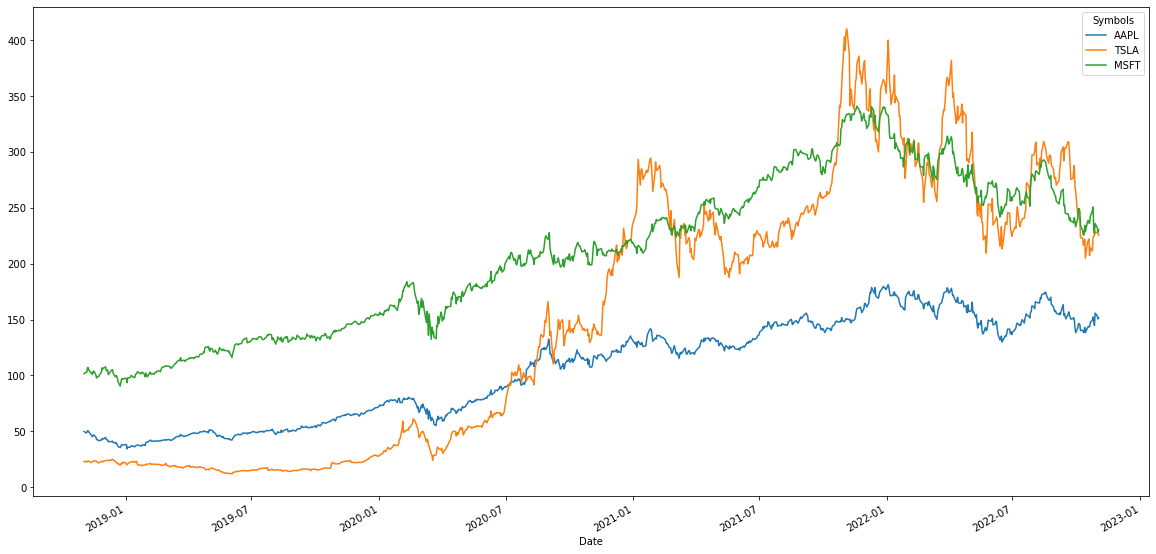

In [4]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

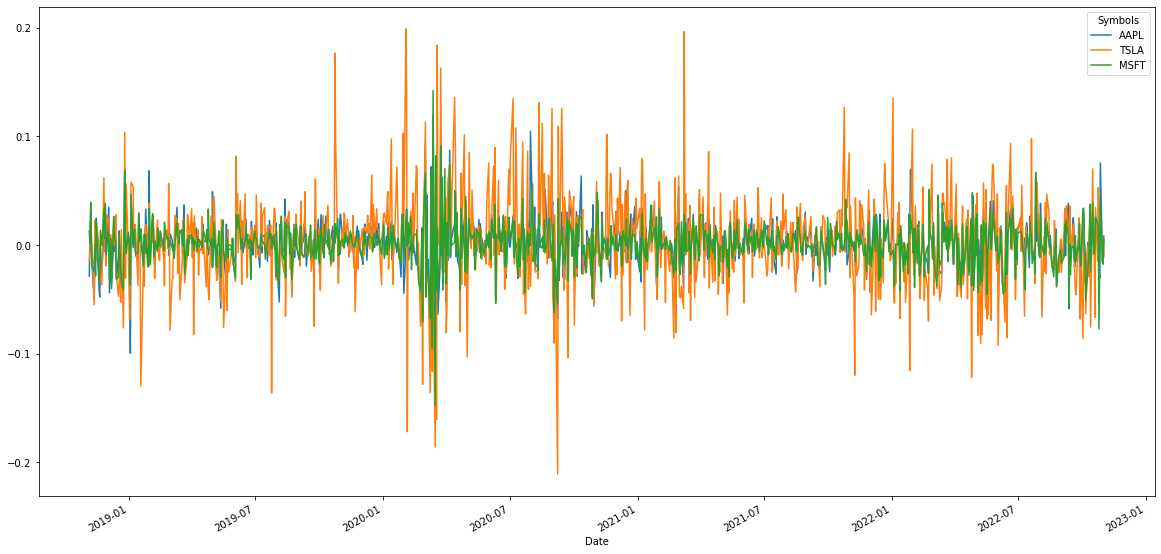

In [5]:
returns.plot(figsize=(20,10))

Expected Returns

In [6]:
d=len(returns)
expret=returns.mean()


Covariance Matrix

In [7]:
covm=returns.cov()
covm

Symbols,AAPL,TSLA,MSFT
Symbols,,,
AAPL,0.000478,0.000450,0.000343
TSLA,0.000450,0.001744,0.000404
MSFT,0.000343,0.000404,0.000399


Efficient Portfolio Calculation

In [8]:
wt=np.linspace(-1,1,10000)
wt = [ round(elem, 3) for elem in wt ]
wp=[]
for i in range(0,10000000):
    t=[]
    p=n-1
    t.append(wt[random.randrange(0,10000)])
    while(p>0):
        t.append(wt[random.randrange(0,10000)])
        p=p-1
    if sum(t)==1:
        wp.append(t)



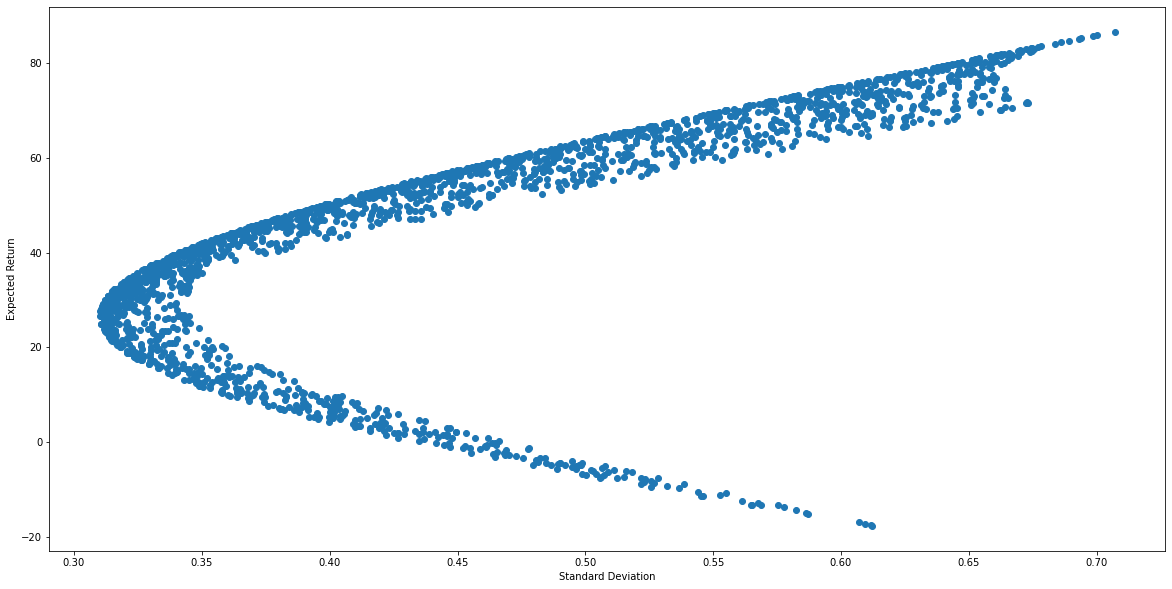

In [24]:
retsh=[]
stdsh=[]
shar=[]
for i in range(0,len(wp)):
    w=wp[i]
    retr=np.sum(w*expret)*252
    std=np.sqrt(np.dot(np.transpose(w),np.dot(covm,w)))*np.sqrt(252)
    riskf=0.04
    sharpe=(retr-riskf)/std
    retsh.append(retr)
    stdsh.append(std)
    shar.append(sharpe)
expretu=np.dot(retsh,100)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(stdsh,expretu)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
maxs=shar[0]
pos=0
for i in range(0,len(shar)):
    if shar[i]>maxs:
        maxs=shar[i]
        pos=i


In [31]:
pos

1438

In [25]:
print('\033[1mAsset Allocation\033[0m')
for i in range(0,n):
    print('%s = %f'%(stocktickers[i],wp[pos][i]))
print('Sharpe Ratio for the Portfolio is %f'%shar[pos])

Asset Allocation
AAPL = 0.702000
TSLA = 0.620000
MSFT = -0.322000
Sharpe Ratio for the Portfolio is 1.192402


Calculation of VAR array for the corresponding Sharpe Ratios

In [12]:
weightedpos=np.dot(wp,port)
end=dt.datetime.now()
start=dt.datetime(end.year-5,end.month,end.day)
df=reader.get_data_yahoo(stocktickers,start,end)['Adj Close']
returns=np.log(1+df.pct_change())
def VaR(Position,sigma,Quantile):
    return Position*sigma*scipy.stats.norm.ppf(Quantile)
d=df.iloc[-1]
vara=[]
for k in range(0,len(weightedpos)):
    Vararray1=[]
    for i in range(len(weightedpos[k])):
        Vararray1.append(VaR(weightedpos[k][i],returns.std()[i],0.99))
    vector1=np.array(Vararray1)
    value1=(np.dot(np.dot(vector1,returns.corr()),vector1))**(1/2)
    vara.append(value1)


In [27]:
vara #vararray

[43814.47374103292,
 54526.10054983655,
 91687.08100635454,
 68499.84895836086,
 91741.74451872105,
 59402.95925607798,
 44530.61910612542,
 52909.60143309706,
 47621.28054625764,
 63020.83188389791,
 56970.21725781782,
 59026.58313467235,
 79807.84697389086,
 53947.99819912249,
 76139.5652914098,
 79813.2313424935,
 49009.749678944274,
 43622.40020503514,
 44803.42648742981,
 54776.63727886434,
 79493.80769892114,
 54991.16488690931,
 56691.93737226168,
 43557.81423428588,
 46918.02744973893,
 52493.4616082642,
 55731.7861575338,
 47711.4615906621,
 54951.35837918414,
 43809.614961481886,
 52841.47794711736,
 48681.623225963354,
 93252.40197335064,
 55108.96342129452,
 86604.92911095431,
 94235.98755056548,
 49274.3595535293,
 43883.28262073271,
 43956.84212732338,
 48031.70118848426,
 83125.1779110428,
 56917.10033560317,
 44294.870537154304,
 80373.10739498092,
 45978.66681563885,
 71251.65641169793,
 44812.99444740935,
 63361.20770543725,
 76087.55212844863,
 47170.0183038238,
 666

In [14]:
shar

[0.8025171791109795,
 0.1532709334863784,
 1.139327065937761,
 1.1085695491397487,
 1.1760215107732628,
 0.0013829080207150538,
 0.9297917680424675,
 0.28617182943119646,
 0.9151020849142426,
 1.1451513847539718,
 1.060457970199582,
 0.04164192633866616,
 1.0259628465891502,
 0.955395790114619,
 1.0617146241211008,
 1.0178589056869054,
 0.2539646765965336,
 0.6377395764282576,
 0.6014098549637172,
 1.0731660438231738,
 1.1886395776359797,
 0.16627320932902748,
 0.11810379659412984,
 0.829206993355534,
 1.014282401267384,
 1.1294510714105865,
 1.151253562363277,
 0.8809064155894752,
 1.138390745364347,
 0.7210465726709252,
 1.1150533328938235,
 0.9322273872965208,
 1.110438425268784,
 0.1016210848193181,
 1.131039037327076,
 1.1506328278502975,
 1.0929257135836323,
 0.7975245997789311,
 0.587805024034919,
 0.564518598593982,
 1.1583632493498703,
 0.08861436646827733,
 0.8864369050233479,
 1.0530357645977426,
 0.9177208867222078,
 1.1923403858725952,
 0.8362655956077119,
 -0.092628550226

Text(0, 0.5, 'Sharpe Ratio')

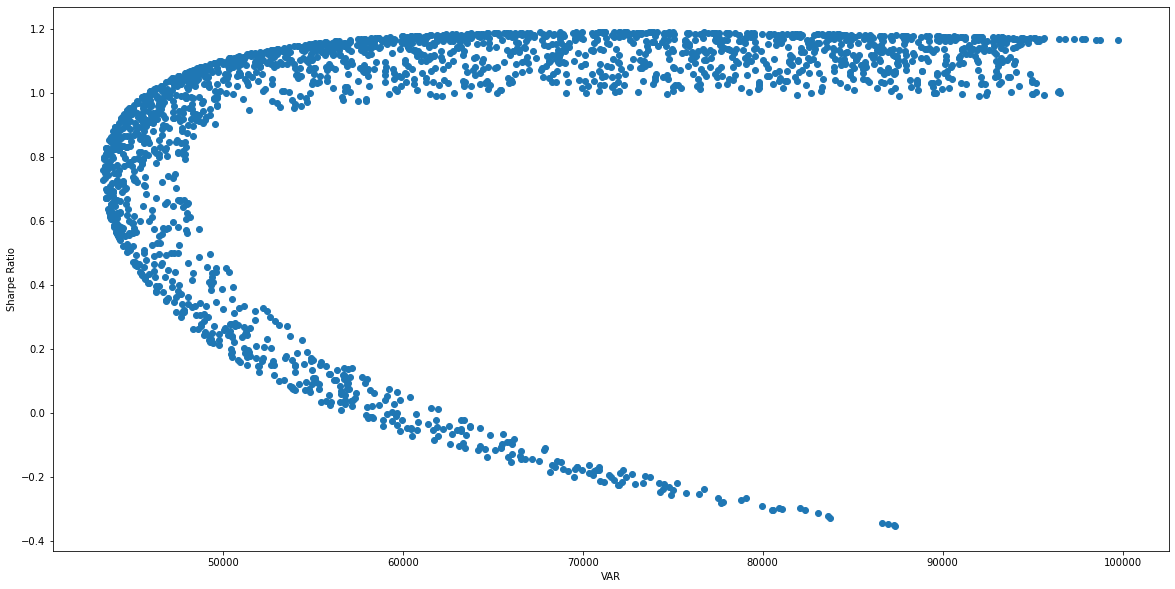

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(vara,shar)
plt.xlabel('VAR')
plt.ylabel('Sharpe Ratio')

Correlation between Sharpe Ratios and VaR

In [16]:
from scipy.stats import pearsonr
corr, _ = pearsonr(shar, vara)
corr

0.30131919335699237

Optimization of Sharpe Ratio and VaR

In [32]:
maxsh=max(shar)
minvar=min(vara)
f=0
pos=0
for i in range(0,len(shar)):
    k=(shar[i]/maxsh)*(minvar/vara[i])
    if k>f:
        f=k
        pos=i

    
    

In [33]:
pos

541

In [19]:
shar[pos] #Sharpe of optimized portfolio

1.0650955430288054

In [20]:
vara[pos] #VaR of optimized portfolio

47927.51476711074

In [30]:
weightedpos[pos] #Portfolio Allocation

array([ 702000.,  620000., -322000.])